### ASTR 3300/5300$-$003: Astrostatistics
***N. Pol***
___

# Homework 2
### Due: Friday, Feb 7, at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

In [2]:
# importing things
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

### Solution

1) Guassian $$  N=\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{x^2}{2\sigma^2}\right) $$ and Half $$ N_{1/2}= \frac{\sqrt{2}}{\sigma\sqrt{\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) $$

2) $$ \int_0^\infty x^3 \frac{N_{1/2}\sigma\sqrt{\pi}}{\sqrt{2}}  \,dx = 2\sigma^4 .$$

Approximate integral: 161.00583293516917
162


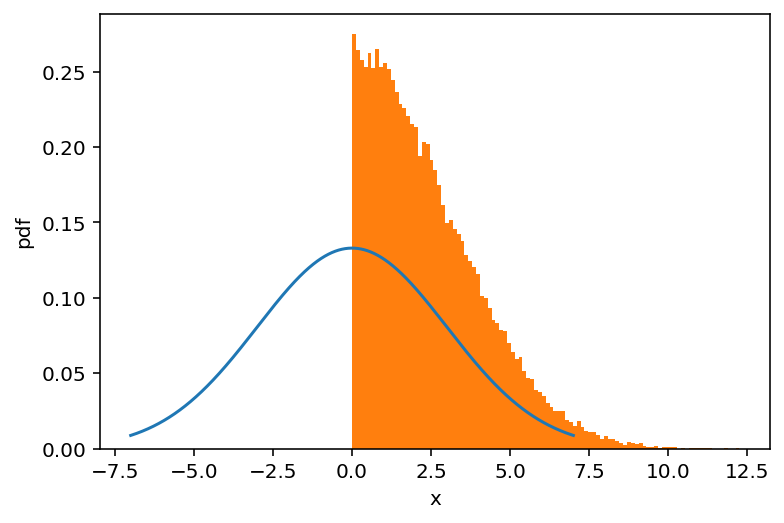

In [355]:
#part 3
#taking some code from lecture 4
N = 10**5 # Number of draws
mu = 0 # Location
sigma_h = 3 #sd

xgrid = np.linspace(-7,7,N) # Array to sample the space 
distG = scipy.stats.norm(mu, sigma_h)#creating gauss dist
plt.plot(xgrid, distG.pdf(xgrid)) # plotting dist

x = np.random.normal(mu, sigma_h,N) # N random draws

#masking anything less than 0
mask = x>0
monte_carlo = x[mask]

#labels for plot
plt.xlabel('x')
plt.ylabel('pdf')

#plotting draws
plt.hist(monte_carlo, bins=100, density=True)
scale=sigma_h*(np.sqrt(np.pi))/(np.sqrt(2))


#integration montecarlo
a=0
b=1000
#need some x values
x = uniform.rvs(a,b,N)
#putting them into the function under the intergral
func=x**3*np.exp((-x**2)/(2*sigma_h**2))
#area under the curve
y=(b - a) * np.mean(func)


print("Approximate integral:", y)
print(2*sigma_h**4)

In [354]:
#part 4 repeating for N=10^2,10^3,10^4
N = 10**2 # Number of draws
mu = 0 # Location
sigma_h = 3 

xgrid = np.linspace(-7,7,N) # Array to sample the space 
distG = scipy.stats.norm(mu, sigma_h) # Complete

x = np.random.normal(mu, sigma_h,N) # N random draws

#masking anything less than 0
mask = x>0
monte_carlo = x[mask]

#integration montecarlo
i=0
a=0
b=1000
area1=[]
#looping to draw 100 batches
for i in range (99):

#need some x values
    x=uniform.rvs(a,b,N)
#putting them into the function under the intergral
    func=x**3*np.exp((-x**2)/(2*sigma_h**2))
#area under the curve
    y=(b - a) * np.mean(func)
    area1.append(y)

print("Approximate integral 10^2:", np.mean(area1))
print(2*sigma_h**4)

#part 4 repeating for N=10^3
N = 10**3 # Number of draws
mu = 0 # Location
sigma_h = 3 

xgrid = np.linspace(-7,7,10000) # Array to sample the space 
distG = scipy.stats.norm(mu, sigma_h) # Complete

x = np.random.normal(mu, sigma_h,N) # N random draws

#masking anything less than 0
mask = x>0
monte_carlo = x[mask]

#integration montecarlo
i=0
a=0
b=1000
area2=[]
#looping to draw 100 batches
for i in range (99):

#need some x values
    x=uniform.rvs(a,b,N)
#putting them into the function under the intergral
    func=x**3*np.exp((-x**2)/(2*sigma_h**2))
#area under the curve
    y=(b - a) * np.mean(func)
    area2.append(y)

print("Approximate integral 10^3:", np.mean(area2))
print(2*sigma_h**4)


#part 4 repeating for N=10^3
N = 10**4 # Number of draws
mu = 0 # Location
sigma_h = 3 

xgrid = np.linspace(-7,7,10000) # Array to sample the space 
distG = scipy.stats.norm(mu, sigma_h) # Complete

x = np.random.normal(mu, sigma_h,N) # N random draws

#masking anything less than 0
mask = x>0
monte_carlo = x[mask]

#integration montecarlo
i=0
a=0
b=1000
area3=[]
#looping to draw 100 batches
for i in range (99):

#need some x values
    x=uniform.rvs(a,b,N)
#putting them into the function under the intergral
    func=x**3*np.exp((-x**2)/(2*sigma_h**2))
#area under the curve
    y=(b - a) * np.mean(func)
    area3.append(y)

print("Approximate integral 10^4:", np.mean(area3))
print(2*sigma_h**4)



Approximate integral 10^2: 147.24619627122345
162
Approximate integral 10^3: 175.15853183297256
162
Approximate integral 10^4: 163.67637129286356
162


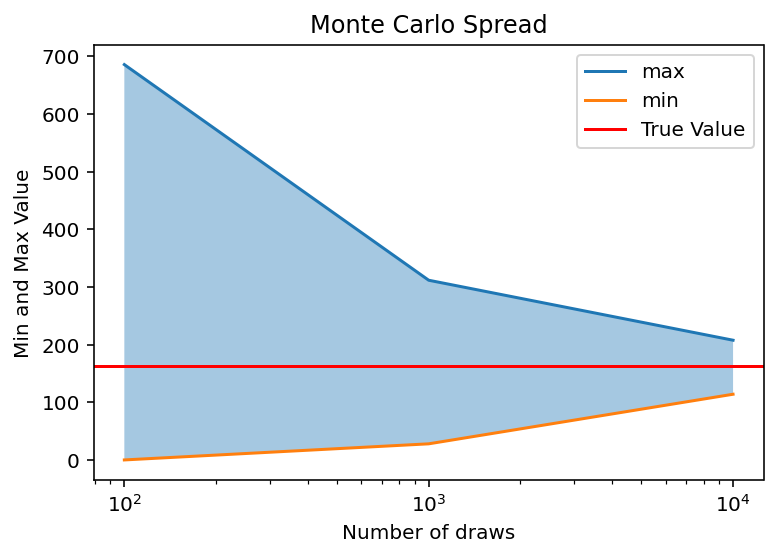

In [334]:
#xvalues
x=[10**2,10**3,10**4]

#getting the min and max from the 100 evaluations for each N
max1=np.max(area1)
min1=np.min(area1)
max2=np.max(area2)
min2=np.min(area2)
max3=np.max(area3)
min3=np.min(area3)
#yvalues for plot
ymax=[max1,max2,max3]
ymin=[min1,min2,min3]

#plotting and labeling
plt.plot(x,ymax,label='max')
plt.fill_between(x,ymax,ymin,alpha=.4)
plt.plot(x,ymin,label='min')

plt.xscale('log') #making sure log scale
plt.axhline(162,color='r',label='True Value')
plt.title("Monte Carlo Spread")
plt.xlabel("Number of draws")
plt.ylabel('Min and Max Value')
plt.legend()

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

at x=145 the value is: 0.0002954565607958672 Ten draws [ 92.03402359  97.83443246 112.94332873 113.04315951  85.43972054
 103.64043738 106.23182281  88.18953558 115.67021468  98.8241955 ]


Text(0, 0.5, 'Prob Value')

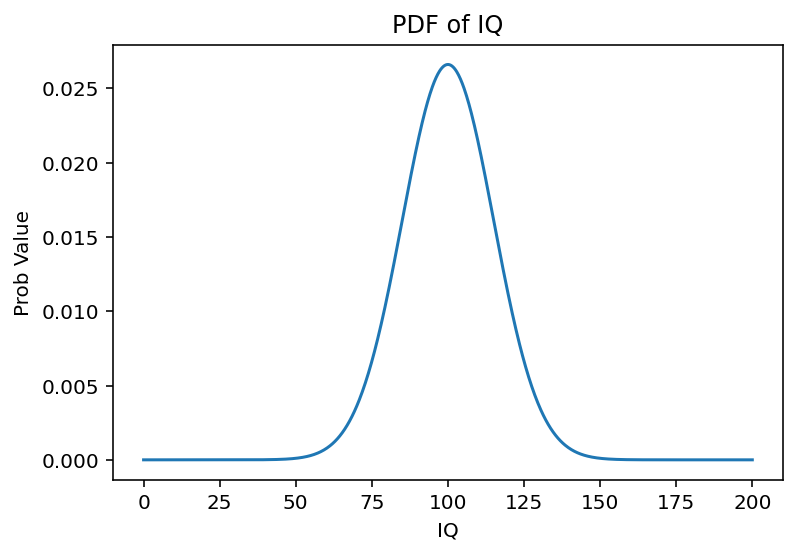

In [305]:
#part 1
#creating x values
xgrid = np.linspace(0,200,num=1000)
mu=100 #mean
sigma=15 #sd
distG=scipy.stats.norm(mu,sigma) #creating dist
#pdf
GaussPDF= distG.pdf(xgrid)
#plotting
plt.plot(xgrid,GaussPDF)

#lets draw some values
y=distG.rvs(10)
at145=distG.pdf(145)
print("at x=145 the value is:",at145,"Ten draws",y)

plt.title("PDF of IQ")
plt.xlabel("IQ")
plt.ylabel('Prob Value')

Text(0, 0.5, 'Cumulative Prob Value')

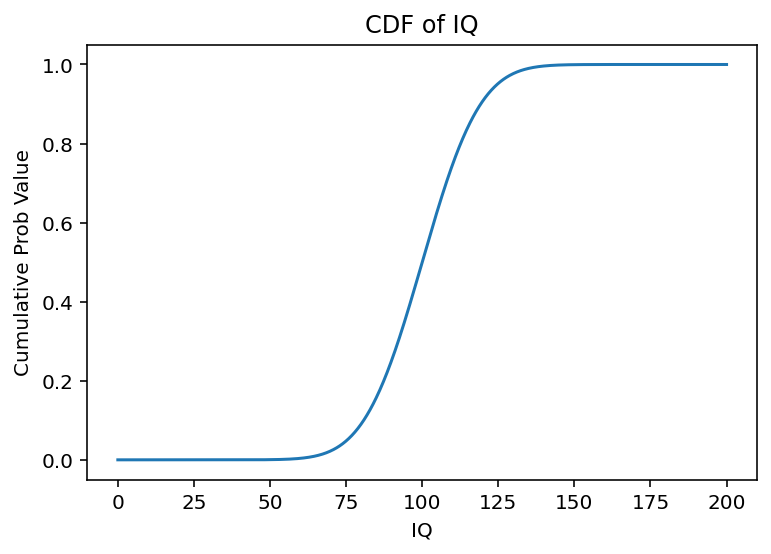

In [306]:
#part 2
#taking code from lecture 3
gaussCDF = distG.cdf(xgrid)
plt.plot(xgrid,gaussCDF)
plt.title("CDF of IQ")
plt.xlabel("IQ")
plt.ylabel('Cumulative Prob Value')

119.22327348316901


Text(0, 0.5, 'Prob Value')

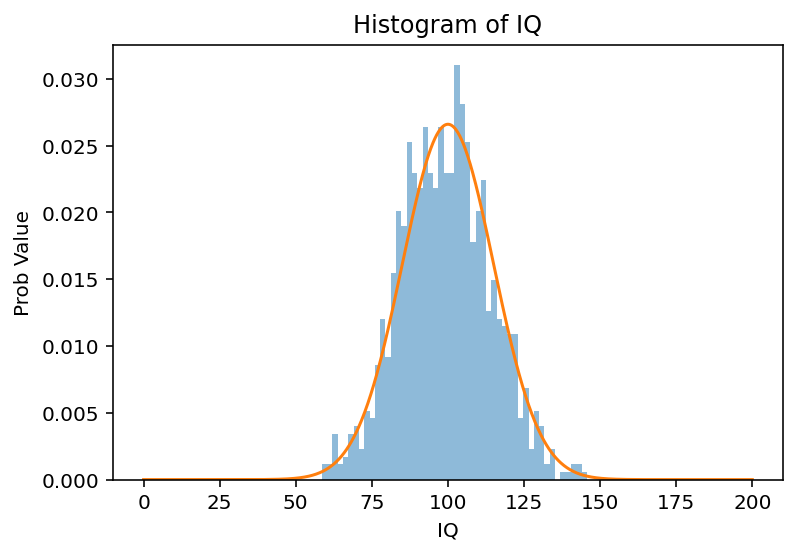

In [307]:
#part 2 continued

#from lecture 4
sample_data = np.random.normal(100,15,10000)
# make a simple histogram object
counts, bins = np.histogram(sample_data, bins=50, density=True)
bin_mids = (bins[1:] + bins[:-1]) / 2 # mid location of bins
 
simple_cdf = np.cumsum(counts) / np.sum(counts) # very simply cumulative sum

# set up an interpolation of the inverse cumulative distribution
tck = scipy.interpolate.interp1d(simple_cdf, bin_mids)

# sample evenly along the cumulative distribution, and interpolate
# little hack to make sure no points are generated outside interpolation range.
# not ideal
u = np.random.uniform(0.001, 0.999, 1000) 
x_sample = tck(u)

plt.hist(x_sample, bins=50, density=True,alpha=.5);
plt.plot(xgrid,GaussPDF)

gaussppf=scipy.stats.norm.ppf(.9, loc=100, scale=15) 
print(gaussppf)

plt.title("Histogram of IQ")
plt.xlabel("IQ")
plt.ylabel('Prob Value')

In [308]:
#145 is 3sigma away from mean
#taking from lecture 3
N=10000
mu=100
sigma=15
distN = scipy.stats.norm(mu, sigma) 
#it is ok to stop at 7 sigma as IQ can't be above 200 but going to 10 to be safe
xgrid = np.linspace(mu+3*sigma,mu+10*sigma,N) #taking anything above 3 sigma
dx = (xgrid.max()-xgrid.min())/N
prob = distN.pdf(xgrid)*dx

#equvalently and more easily 
prob=1-distN.cdf(145)

print(prob.sum(),"for >+3 sigma")
print(prob,"for >+3 sigma")
print('probability is', prob.sum()*100 ,'%')
print('approx 27/20000')

0.0013498980316301035 for >+3 sigma
0.0013498980316301035 for >+3 sigma
probability is 0.13498980316301035 %
approx 27/20000


In [234]:
#5) one in a million is generally around 5 sigma
N=10000
mu=100
sigma=15
distN = scipy.stats.norm(mu, sigma) 
xgrid = np.linspace(mu+4.5*sigma,mu+10*sigma,N) #guessing simga level to get 10^-6 
dx = (xgrid.max()-xgrid.min())/N
prob = distN.pdf(xgrid)*dx

print(prob.sum(),"for >+4.5 sigma")
print("IQ around",100+15*4.5)

3.401730699558795e-06 for >+4.5 sigma
IQ around 167.5


## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

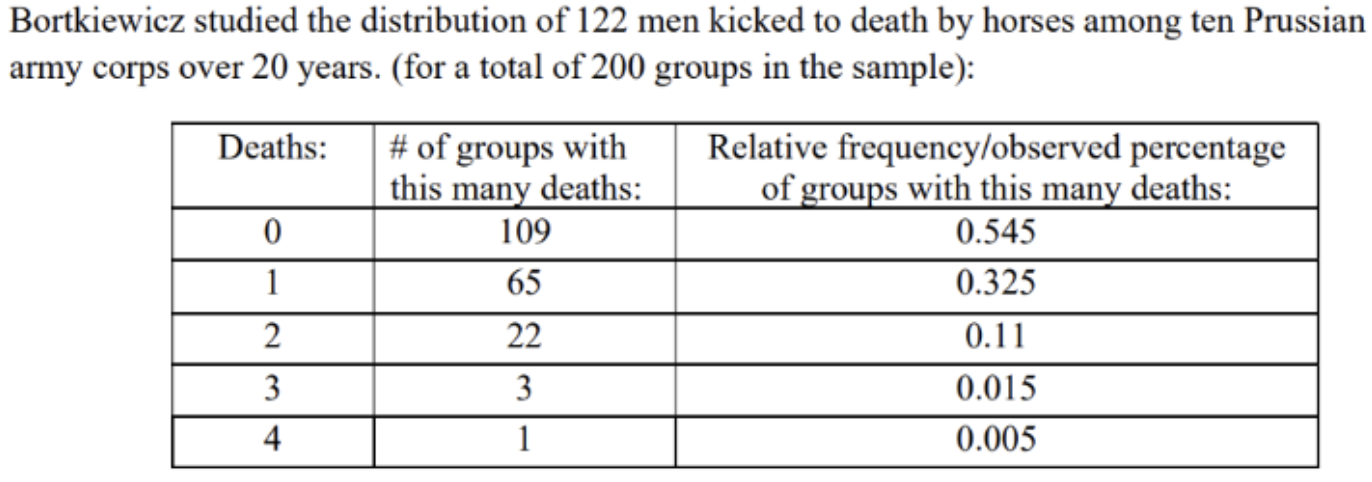

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

Text(0.5, 1.0, 'Emperical Dist')

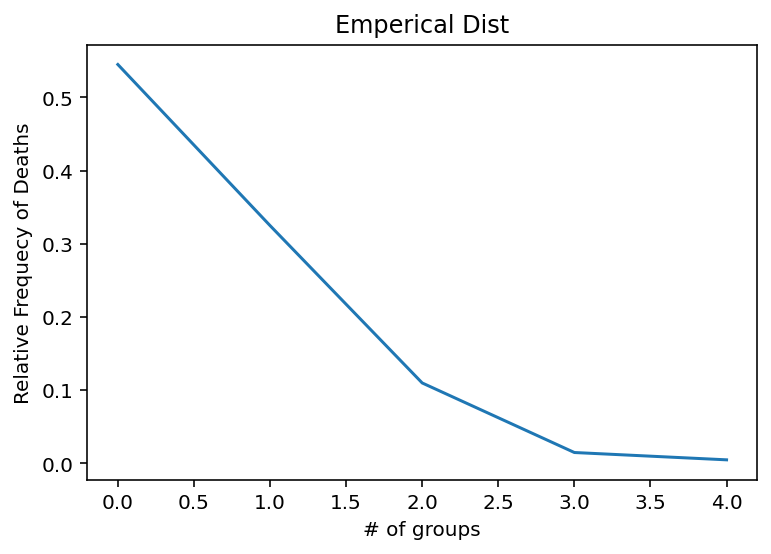

In [309]:
#1) plotting 1st and 3rd columns
x=[0,1,2,3,4]
y=[.545,.325,.11,.015,.005]
plt.plot(x,y)
plt.xlabel('# of groups')
plt.ylabel('Relative Frequecy of Deaths')
plt.title('Emperical Dist')

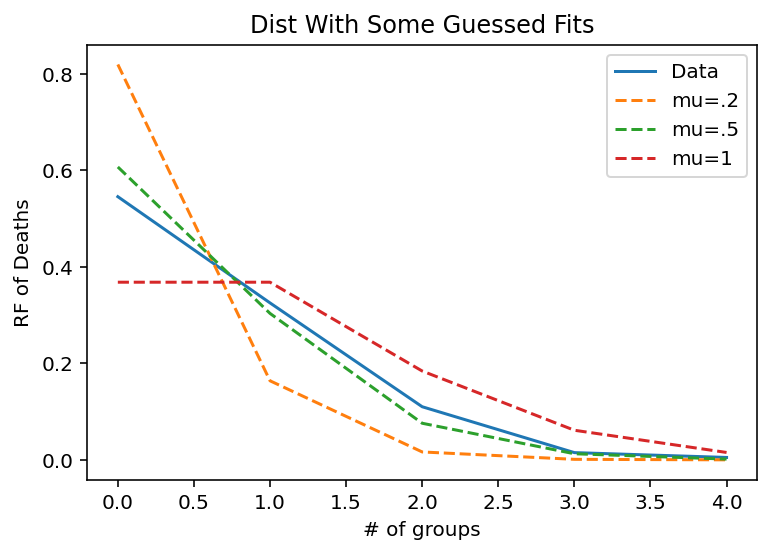

In [311]:
#1) plotting 1st and 3rd columns
x=[0,1,2,3,4]
y=[.545,.325,.11,.015,.005]
plt.plot(x,y,label='Data')
plt.xlabel('# of groups')
plt.ylabel('RF of Deaths')

#set a mu guess
mu = .2
#get some x value
x = np.arange(0,5)
# Calculate the PMF for each x value
pmf = poisson.pmf(x, mu)

# Plot the distribution
plt.plot(x, pmf,label="mu=.2",linestyle='--')

#set a mu guess
mu = .5

# Calculate the PMF for each x value
pmf = poisson.pmf(x, mu)

# Plot the distribution
plt.plot(x, pmf,label="mu=.5",linestyle='--')
plt.legend()

#set a mu guess
mu = 1
# Calculate the PMF for each x value
pmf = poisson.pmf(x, mu)

# Plot the distribution
plt.plot(x, pmf,label="mu=1",linestyle='--')
plt.title('Dist With Some Guessed Fits')
plt.legend()

0.6100000000000001


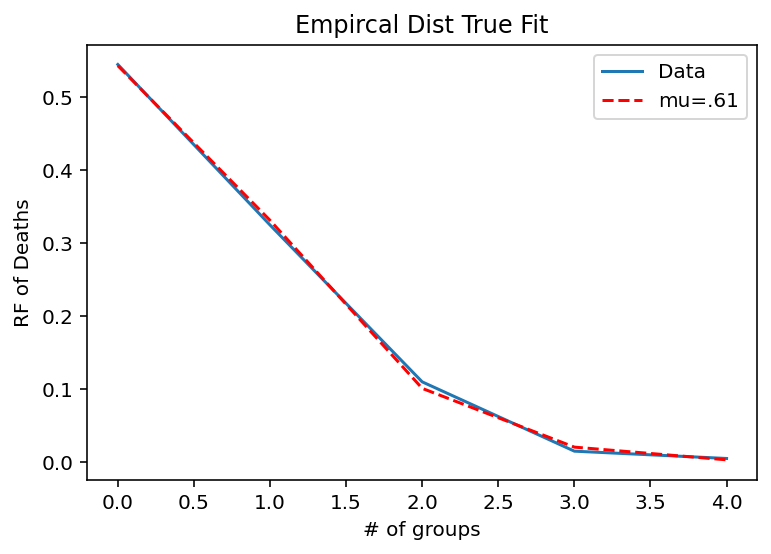

In [314]:
# weighted mean
x=[0,1,2,3,4]
y=[.545,.325,.11,.015,.005]
meaner=0
for i in range (len(x)):
    mean=(x[i]*y[i])
    meaner=meaner+mean
print(meaner)

x=[0,1,2,3,4]
y=[.545,.325,.11,.015,.005]
plt.plot(x,y,label='Data')
plt.xlabel('# of groups')
plt.ylabel('RF of Deaths')

#set a mu guess
mu = meaner
#get some x value
x = np.arange(0,5)
# Calculate the PMF for each x value
pmf = poisson.pmf(x, mu)

# Plot the distribution
plt.plot(x, pmf,label="mu=.61",linestyle='--',color='r')
plt.title('Empircal Dist True Fit')
plt.legend()
